Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<ipython-input-11-8057606c2cfa>:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(y) for y in plt.gca().get_yticks()])  # Formatar ticks do eixo y em porcentagem


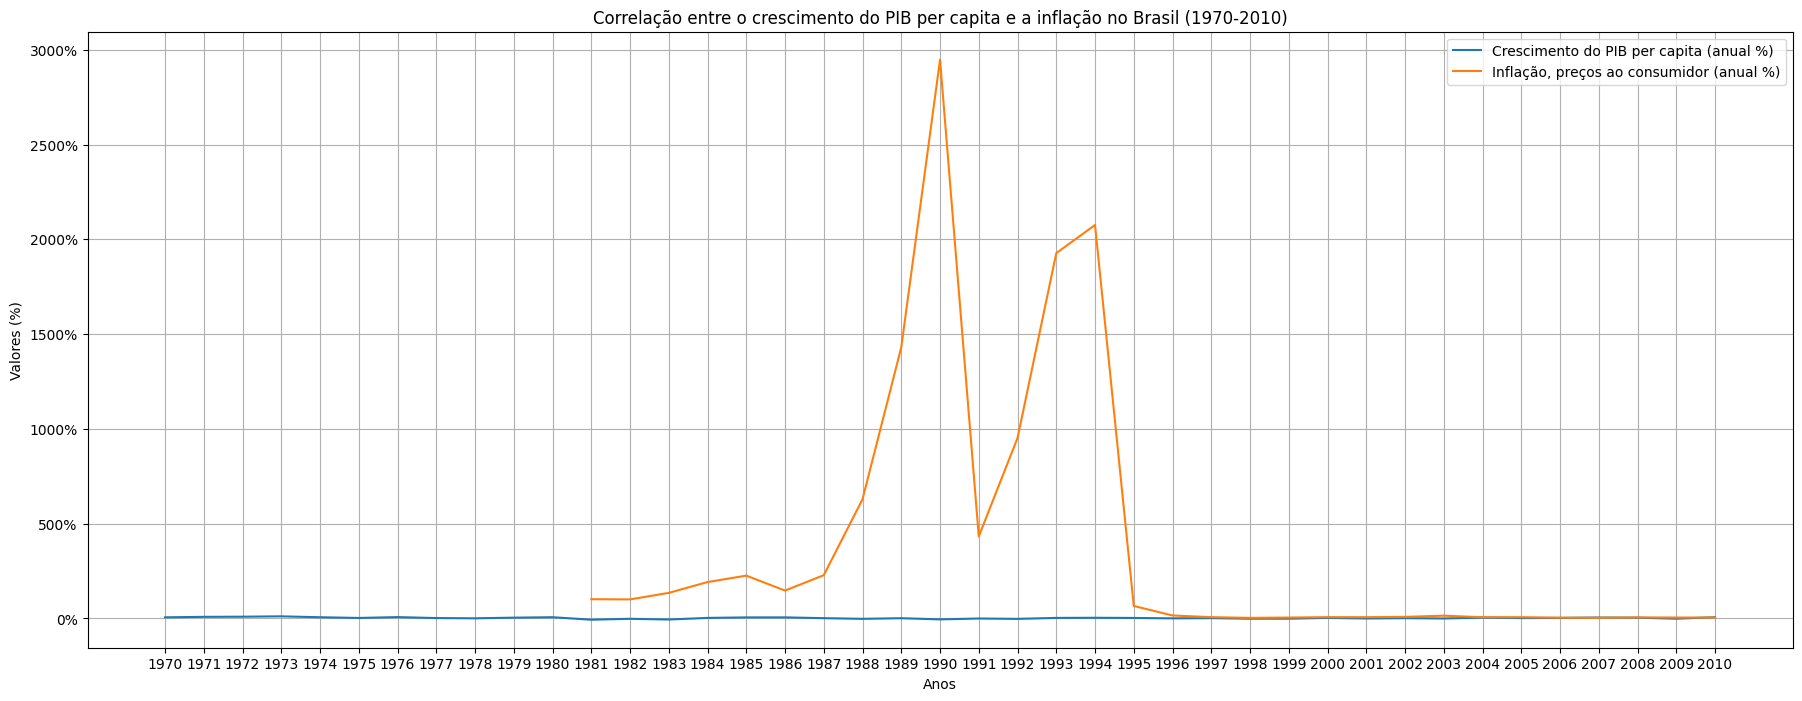

In [11]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

# Função para montar o Google Drive
def montar_drive():
     """Monta o Google Drive no Colab para acesso aos dados."""
     drive.mount('/content/gdrive')

# Função para carregar dados de um arquivo CSV
def carregar_dados(caminho, conjunto_dados):
     """Carrega o conjunto de dados do Google Drive.

     Args:
         caminho (str): O caminho para o diretório no Google Drive.
         conjunto_dados (str): O nome do arquivo do conjunto de dados.

     Returns:
         pd.DataFrame: O conjunto de dados carregado.
     """
     caminho_conjunto_dados = caminho + conjunto_dados
     try:
         return pd.read_csv(caminho_conjunto_dados, sep=';', decimal=',')
     except FileNotFoundError:
         raise FileNotFoundError(f"Arquivo não encontrado na pasta. {caminho_conjunto_dados}")

# Função para filtrar e analisar dados
def analisar_dados(dados_banco_dados, indicador, codigo_pais, anos):
     """Filtra e analisa dados para um indicador, país e anos específicos.

     Args:
         dados_banco_dados (pd.DataFrame): O conjunto de dados a ser filtrado.
         indicador (str): O nome do indicador para filtrar.
         codigo_pais (str): O código do país.
         anos (list): Uma lista de anos a serem considerados.

     Returns:
         pd.DataFrame: Os dados filtrados para o indicador, país e anos especificados.
     """
     colunas = ['Country Code'] + anos
     dados_filtrados = dados_banco_dados[dados_banco_dados['Indicator Name'].str.contains(indicador)][colunas]
     dados_filtrados = dados_filtrados[dados_filtrados['Country Code'] == codigo_pais]

     if dados_filtrados.empty:
         raise ValueError("Nenhum dado encontrado para os critérios especificados.")

     return dados_filtrados[anos]

# Configurações
caminho = '/content/gdrive/MyDrive/'
conjunto_dados = 'wdi_paises_america_sul_series_validas.csv'
anos = [str(ano) for ano in range(1970, 2011)]

# Montar o Google Drive
montar_drive()

# Carregar o conjunto de dados
dados_banco_dados = carregar_dados(caminho, conjunto_dados)

# Analisar os dados para o crescimento do PIB per capita e a inflação no Brasil
try:
     dados_pib = analisar_dados(dados_banco_dados, 'GDP per capita growth', 'BRA', anos)
     dados_inflacao = analisar_dados(dados_banco_dados, 'Inflation, consumer prices', 'BRA', anos)

     # Plotar o gráfico de correlação
     plt.figure(figsize=(22, 8))
     plt.plot(anos, dados_pib.values[0], label='Crescimento do PIB per capita (anual %)')
     plt.plot(anos, dados_inflacao.values[0], label='Inflação, preços ao consumidor (anual %)')
     plt.xlabel('Anos')
     plt.ylabel('Valores (%)')  # Alteração no rótulo do eixo y para indicar porcentagem
     plt.title('Correlação entre o crescimento do PIB per capita e a inflação no Brasil (1970-2010)')
     plt.legend()
     plt.grid(True)
     plt.gca().set_yticklabels(['{:.0f}%'.format(y) for y in plt.gca().get_yticks()])  # Formatar ticks do eixo y em porcentagem
     plt.show()

except FileNotFoundError as e:
     print(f"Erro: {e}")
except ValueError as e:
     print(f"Erro: {e}")
